In [17]:
# Importing liabraries
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from prophet import Prophet

import joblib 

# Hyperparameter tuning
import itertools
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_components_plotly

# Enable inline plotting
%matplotlib inline

In [18]:
aep=pd.read_csv("../data/AEP_hourly.csv")
df_main = aep.copy()

In [19]:
df_main.rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'}, inplace=True)
df_main

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [20]:
# Convert MW to GW
df_div=df_main.copy()
df=df_main.copy()
df_div_y=df_div['y'].div(1000)
df["y"]=df_div_y
type(df['y'][2])

numpy.float64

In [21]:
# Turn hourly data to days data
df_aux=df.copy()

# Convert "ds" column to Pandas datetime object
df_aux['ds'] = pd.to_datetime(df_aux['ds'])

# Group values by day and sum them
daily_df = df_aux.groupby(pd.Grouper(key='ds', freq='D'))['y'].sum().reset_index()

# Show the result
daily_df

,ds,y
0,2004-10-01,328.544
1,2004-10-02,311.997
2,2004-10-03,293.450
3,2004-10-04,343.417
4,2004-10-05,346.553
...,...,...
5050,2018-07-30,368.834
5051,2018-07-31,364.327
5052,2018-08-01,363.628
5053,2018-08-02,376.504


In [22]:
# Cut data
# res = df[~(df['ds'] < '2015-01-01')]

In [23]:
df=daily_df
df.describe()

,y
count,5055.000000
mean,371.844219
std,47.605309
min,14.809000
25%,337.265500
50%,366.539000
75%,403.198500
max,548.349000


In [24]:
# Divide test and train data
train = df.iloc[:len(df) - 365]
test = df.iloc[len(df) - 365:]

In [25]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [26]:
# future = m.make_future_dataframe(periods=365, freq="H") #MS for monthly, H for hourly
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



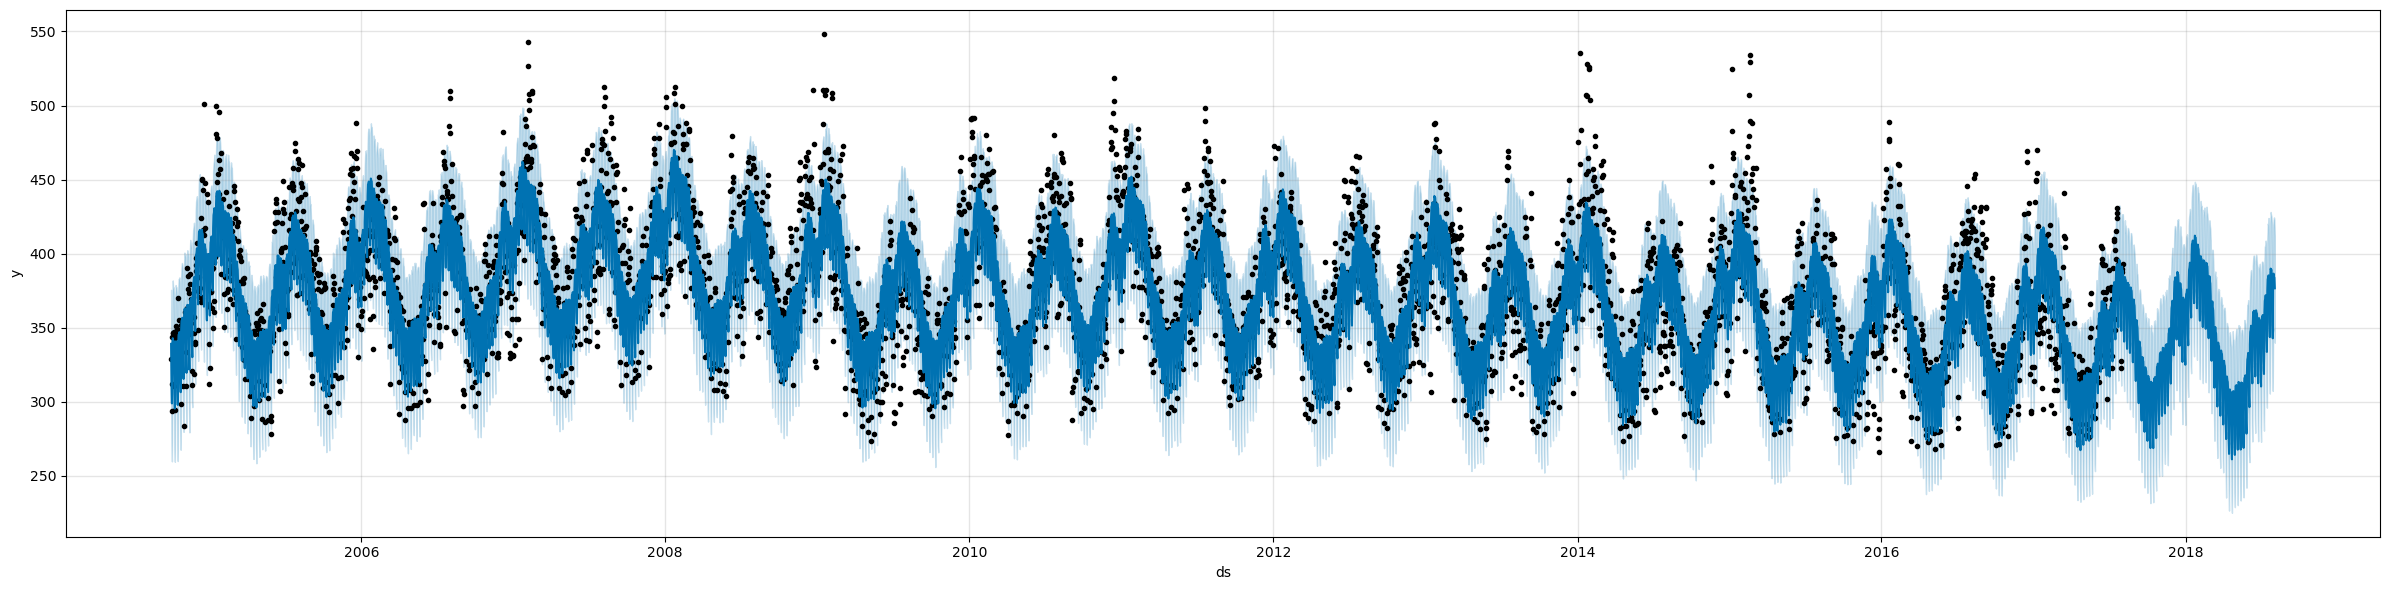

In [27]:
fig = m.plot(forecast, figsize=(24,6))

In [28]:
plot_components_plotly(m,forecast)

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [29]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs

In [30]:
predictions = forecast.iloc[-365:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Absolute Error:", meanabs(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  43.832402473586484
Mean Absolute Error: 31.571739615429824
Mean Value of Test Dataset: 358.07900821917804
